In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player = pd.read_csv('data/baseball/player.csv')
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

### What does each dataset look like?

In [3]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
player_id        18846 non-null object
birth_year       18703 non-null float64
birth_month      18531 non-null float64
birth_day        18382 non-null float64
birth_country    18773 non-null object
birth_state      18220 non-null object
birth_city       18647 non-null object
death_year       9336 non-null float64
death_month      9335 non-null float64
death_day        9334 non-null float64
death_country    9329 non-null object
death_state      9277 non-null object
death_city       9325 non-null object
name_first       18807 non-null object
name_last        18846 non-null object
name_given       18807 non-null object
weight           17975 non-null float64
height           18041 non-null float64
bats             17655 non-null object
throws           17868 non-null object
debut            18653 non-null object
final_game       18653 non-null object
retro_id         18792 non-null

In the `player` dataset, batting and throwing hand may be useful if they have any predictive power for team success. The `final_game` variable will be hlpeful to determine when a player leaves the league.

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
year         25575 non-null int64
team_id      25575 non-null object
league_id    25575 non-null object
player_id    25575 non-null object
salary       25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [5]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 21 columns):
year         100951 non-null int64
team_id      100951 non-null object
league_id    100214 non-null object
player_id    100951 non-null object
g_all        100748 non-null float64
gs           49030 non-null float64
g_batting    100951 non-null int64
g_defense    100748 non-null float64
g_p          100951 non-null int64
g_c          100951 non-null int64
g_1b         100951 non-null int64
g_2b         100951 non-null int64
g_3b         100951 non-null int64
g_ss         100951 non-null int64
g_lf         100951 non-null int64
g_cf         100951 non-null int64
g_rf         100951 non-null int64
g_of         100951 non-null int64
g_dh         49233 non-null float64
g_ph         49233 non-null float64
g_pr         42945 non-null float64
dtypes: float64(6), int64(12), object(3)
memory usage: 16.2+ MB


In [6]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
player_id    101332 non-null object
year         101332 non-null int64
stint        101332 non-null int64
team_id      101332 non-null object
league_id    100595 non-null object
g            101332 non-null int64
ab           96183 non-null float64
r            96183 non-null float64
h            96183 non-null float64
double       96183 non-null float64
triple       96183 non-null float64
hr           96183 non-null float64
rbi          95759 non-null float64
sb           94883 non-null float64
cs           72729 non-null float64
bb           96183 non-null float64
so           88345 non-null float64
ibb          59620 non-null float64
hbp          93373 non-null float64
sh           89845 non-null float64
sf           60151 non-null float64
g_idp        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0+ MB


In [7]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
player_id    44139 non-null object
year         44139 non-null int64
stint        44139 non-null int64
team_id      44139 non-null object
league_id    44008 non-null object
w            44139 non-null int64
l            44139 non-null int64
g            44139 non-null int64
gs           44139 non-null int64
cg           44139 non-null int64
sho          44139 non-null int64
sv           44139 non-null int64
ipouts       44138 non-null float64
h            44139 non-null int64
er           44139 non-null int64
hr           44139 non-null int64
bb           44139 non-null int64
so           44139 non-null int64
baopp        42614 non-null float64
era          44049 non-null float64
ibb          29564 non-null float64
wp           44006 non-null float64
hbp          43580 non-null float64
bk           44139 non-null int64
bfp          43900 non-null float64
gf           44006 non-n

In [8]:
fielding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170526 entries, 0 to 170525
Data columns (total 18 columns):
player_id    170526 non-null object
year         170526 non-null int64
stint        170526 non-null int64
team_id      170526 non-null object
league_id    169023 non-null object
pos          170526 non-null object
g            170526 non-null int64
gs           75849 non-null float64
inn_outs     102313 non-null float64
po           156409 non-null float64
a            156408 non-null float64
e            156407 non-null float64
dp           156408 non-null float64
pb           11116 non-null float64
wp           4189 non-null float64
sb           6024 non-null float64
cs           6024 non-null float64
zr           4189 non-null float64
dtypes: float64(11), int64(3), object(4)
memory usage: 23.4+ MB


In [9]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
year                2805 non-null int64
league_id           2755 non-null object
team_id             2805 non-null object
franchise_id        2805 non-null object
div_id              1288 non-null object
rank                2805 non-null int64
g                   2805 non-null int64
ghome               2406 non-null float64
w                   2805 non-null int64
l                   2805 non-null int64
div_win             1260 non-null object
wc_win              624 non-null object
lg_win              2777 non-null object
ws_win              2448 non-null object
r                   2805 non-null int64
ab                  2805 non-null int64
h                   2805 non-null int64
double              2805 non-null int64
triple              2805 non-null int64
hr                  2805 non-null int64
bb                  2805 non-null int64
so                  2685 non-null float64
sb

### Distributions and trends of important variables

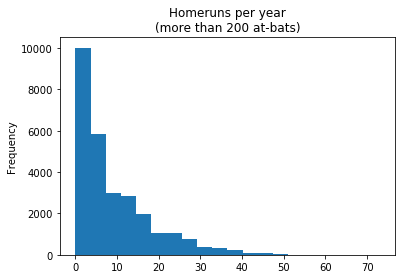

In [179]:
batting[batting.ab>200].hr.plot(kind='hist', bins=20, title='Homeruns per year\n(more than 200 at-bats)')

Mean: 0.2694361841727003


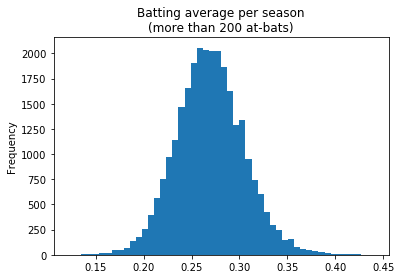

In [177]:
min_ab = 200
avg = batting[batting.ab>min_ab].h / batting[batting.ab>min_ab].ab
avg.plot(kind='hist', bins=50, title='Batting average per season\n(more than 200 at-bats)')
print(f'Mean: {avg.mean()}')

Mean: 2.175014433173653


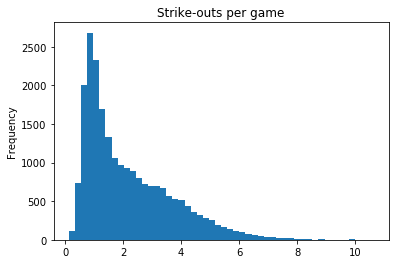

In [103]:
min_g = 20
g = pitching[pitching.g>min_g].g
so = pitching[pitching.g>min_g].so
(so/g).plot(kind='hist', bins=50, title='Strike-outs per game')
print(f'Mean: {(so/g).mean()}')

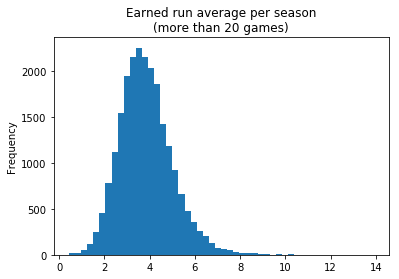

In [176]:
pitching[pitching.g>20].era.plot(kind='hist', bins=50, title='Earned run average per season\n(more than 20 games)')

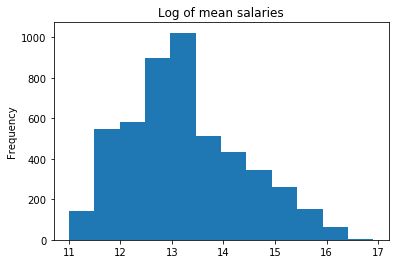

In [236]:
np.log(salary.groupby('player_id')['salary'].mean()).plot(kind='hist', bins=12, title='Log of mean salaries')

In [180]:
salary['salary'] = salary.salary.replace(0.0, np.nan)
salary['l_salary'] = np.log(salary.salary)

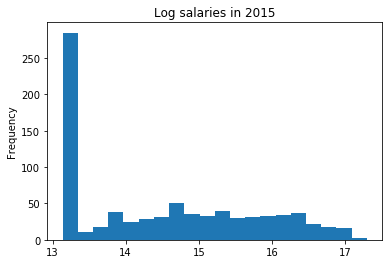

In [215]:
salary[(salary.year == 2015)].l_salary.plot(kind='hist', bins=20, title='Log salaries in 2015')

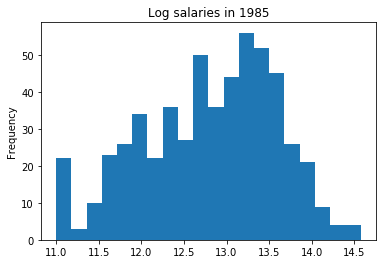

In [182]:
salary[(salary.year == 1985)].l_salary.plot(kind='hist', bins=20, title='Log salaries in 1985')

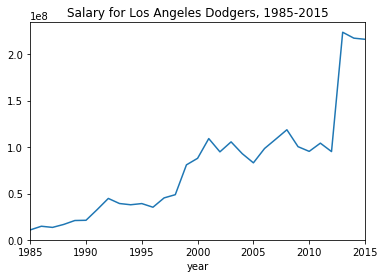

In [184]:
salary[salary.team_id == 'LAN'].groupby('year')['salary'].sum().plot(title='Salary for Los Angeles Dodgers, 1985-2015')

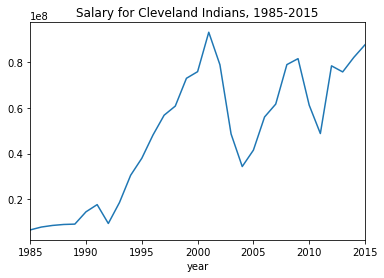

In [189]:
salary[salary.team_id == 'CLE'].groupby('year')['salary'].sum().plot(title='Salary for Cleveland Indians, 1985-2015')

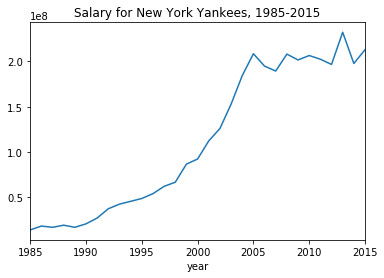

In [190]:
salary[salary.team_id == 'NYA'].groupby('year')['salary'].sum().plot(title='Salary for New York Yankees, 1985-2015')

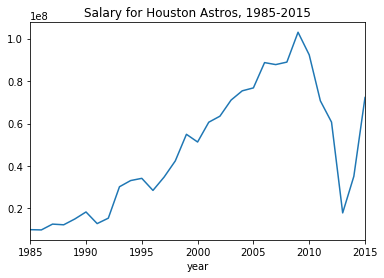

In [239]:
salary[salary.team_id == 'HOU'].groupby('year')['salary'].sum().plot(title='Salary for Houston Astros, 1985-2015')

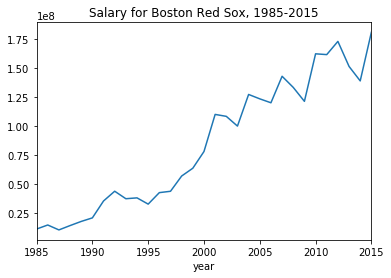

In [237]:
salary[salary.team_id == 'BOS'].groupby('year')['salary'].sum().plot(title='Salary for Boston Red Sox, 1985-2015')

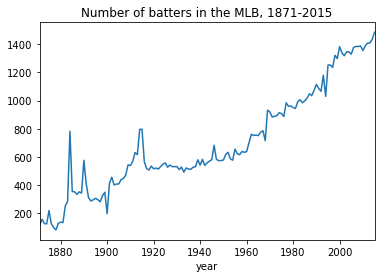

In [49]:
batting.groupby('year').size().plot(title='Number of batters in the MLB, 1871-2015')

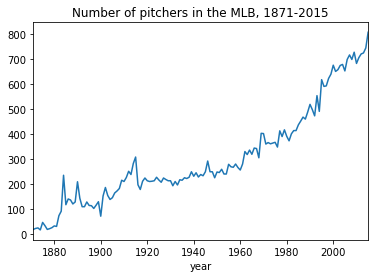

In [50]:
pitching.groupby('year').size().plot(title='Number of pitchers in the MLB, 1871-2015')

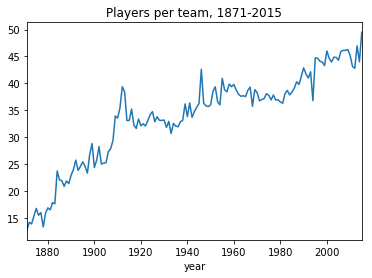

In [192]:
(appearances.groupby('year').size() / team.groupby('year').size()).plot(title='Players per team, 1871-2015')

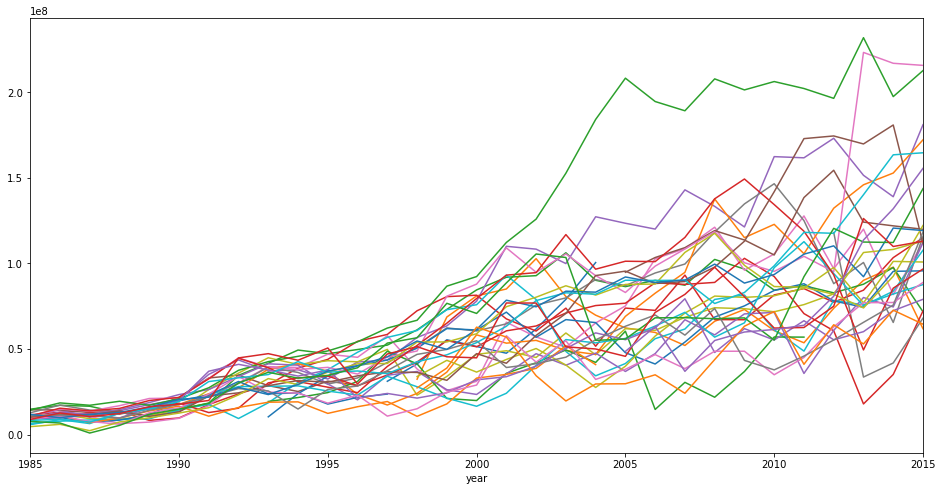

In [19]:
salary.groupby(['year', 'team_id'])['salary'].sum().unstack().plot(legend=False, figsize=(16,8))

### Does hitting get bigger over time?

I first calculate different kinds of averages used by baseball statisticians. The slugger average, the most popular after the normal batting average, weights the average based on the kind of hit. Doubles are twice as important as singles, triples are three times, and homeruns are four times. The difference between a slugger average and a batting average suggest how big of hits a player is getting.

I find that the difference between the median slugger average and the median batting average has been growing over time. This suggests that batters are hitting more extra-base hits now than they used to.

In [5]:
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['avg'] = batting.h / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['ops'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3 + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['woba'] = (batting.h*0.9 + batting.double*0.34 + batting.triple*0.66 + batting.hr*1.05 + batting.bb*0.72 + batting.hbp*0.75) / (batting.ab + batting.bb + batting.hbp)

In [6]:
slug = batting.groupby('year')['slug'].median()
avg = batting.groupby('year')['avg'].median()
obp = batting.groupby('year')['obp'].median()
ops = batting.groupby('year')['ops'].median()
woba = batting.groupby('year')['woba'].median()

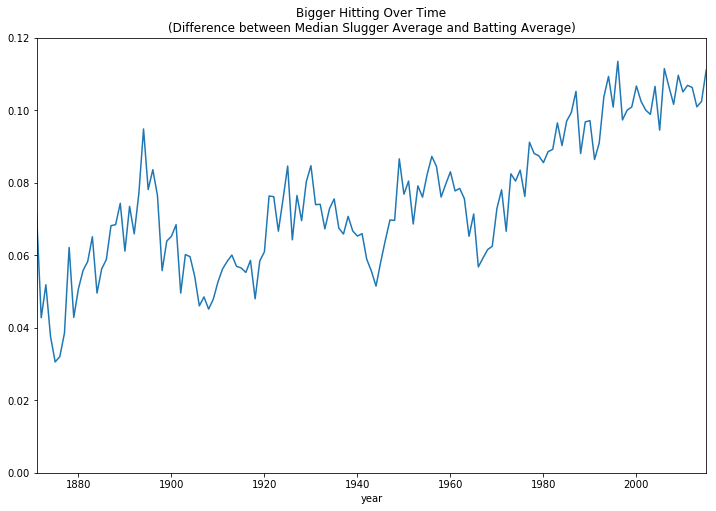

In [7]:
(slug - avg).plot(figsize=(12,8),
                  title='Bigger Hitting Over Time\n(Difference between Median Slugger Average and Batting Average)',
                 ylim=(0,0.12))

### Differences in number of extra-base hits over time

Here I compare the percentages of different kinds of extra-base hits over time. Both homeruns and doubles as a percentage of total at-bats have increased over time, while triples have declined.

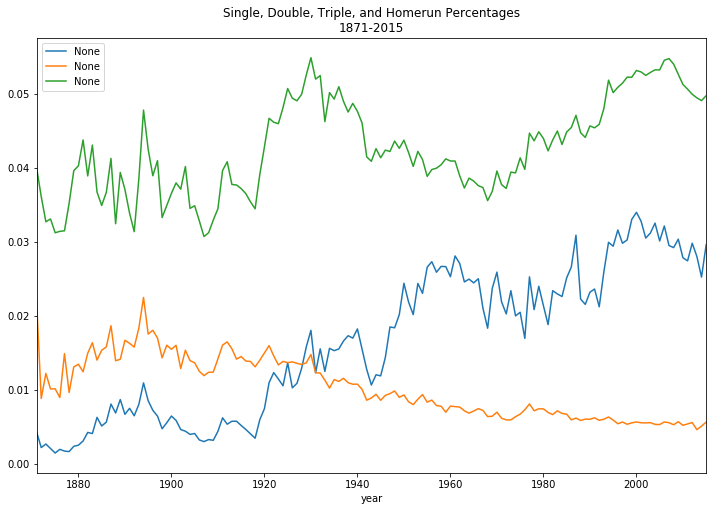

In [8]:
batting['single'] = batting.h - batting.hr - batting.double - batting.triple
hrs = batting.groupby('year')['hr'].sum()
triples = batting.groupby('year')['triple'].sum()
doubles = batting.groupby('year')['double'].sum()
singles = batting.groupby('year')['single'].sum()
ab = batting.groupby('year')['ab'].sum()

(hrs/ab).plot(figsize=(12,8), legend=True, title='Single, Double, Triple, and Homerun Percentages\n1871-2015')
(triples/ab).plot(figsize=(12,8), legend=True)
(doubles/ab).plot(figsize=(12,8), legend=True)

### Why are there less triples over time?

In the graph above, we find that the number of triples per at-bat has steadily declined over time. Why?

One explanation is that fielding has improved, and thus runners are less likely to reach third base safely. As a proxy for fielding, I use average number of errors per inning. As shown below, there is a steady decline in the number of errors over time, which appears to line up with the decline in triples. However, it is possible that there is an exogenous downward trend for both statistics. They would have to be detrended to find a true relationship between them.

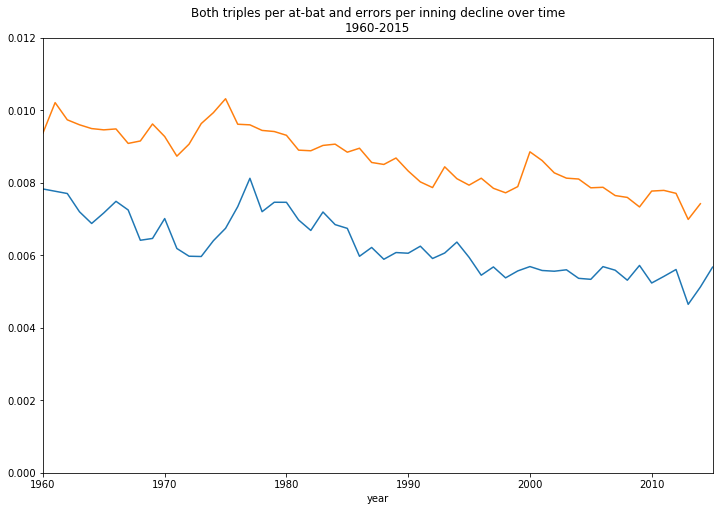

In [9]:
fielding = fielding[(fielding.inn_outs > 0) & (fielding.year > 1959)]
batting = batting[batting.year > 1959]
inns = fielding.groupby('year')['inn_outs'].sum()/3
errors = fielding.groupby('year')['e'].sum()

(triples/ab).plot(figsize=(12,8), xlim=(1960,2015), ylim=(0,.012))
(errors/inns).plot(figsize=(12,8), xlim=(1960,2015),
                   title='Both triples per at-bat and errors per inning decline over time\n1960-2015')

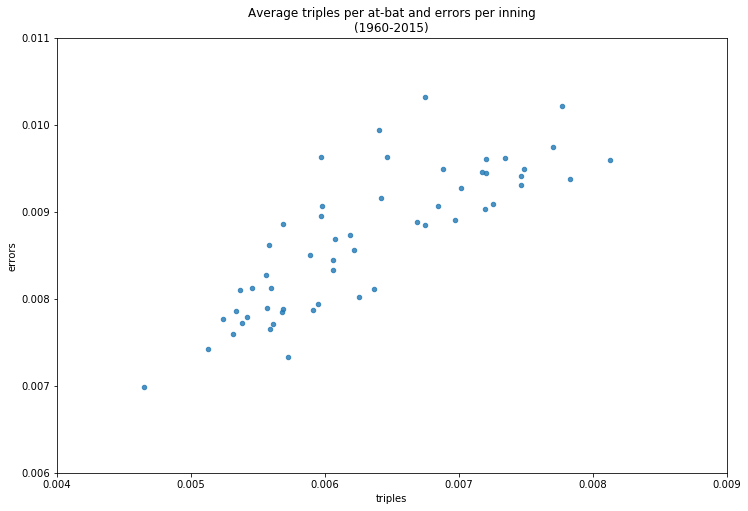

In [10]:
df = pd.concat([(triples/ab), (errors/inns)], axis=1)
df.columns = ['triples', 'errors']
df.plot(x=0, y=1, kind='scatter', figsize=(12,8), alpha=0.8, xlim=(0.004,0.009), ylim=(0.006,0.011),
        title='Average triples per at-bat and errors per inning\n(1960-2015)')

### What is the relationship between homeruns and other kinds of at-bats?

I create scatterplots to see if there is a relationship between different results of at-bats for batters within more than 200 at-bats in 2015. I plot various results compared to homeruns.

I find that there is no correlation between doubles and homeruns. Doubles can be the result of power hitting (which would be positively associated with homeruns) or from speed on the bases (which would be negatively associated with homeruns).

I find that there is a negative correlation between singles and homeruns. Players who hit a lot of homeruns do not hit as many singles. This is likely because homerun hitters also tend to hit more fly balls or strike-out more often (see below).

I find a slightly positive correlation between walks and homeruns. There are two possible explanations here. First, players who hit more homeruns are more patient, and tend to see more pitches, which inevitably leads to more walks on average. Second, pitches are more likely to intentionally throw balls to good hitters, leading to more walks.

Finally, I find a positive correlation between homeruns and strikeouts. This is likely because homerun hitters swing for power instead of contact. Thus, they are more likely to miss the ball when swinging, leading to more strikes, and thus more strikeouts.

In [11]:
batting_2015 = batting[(batting.year == 2015) &
                       (batting.ab > 200)]
batting_2015['bb_avg'] = batting_2015.bb / batting_2015.ab
batting_2015['hr_avg'] = batting_2015.hr / batting_2015.ab
batting_2015['single_avg'] = batting_2015.single / batting_2015.ab
batting_2015['triple_avg'] = batting_2015.triple / batting_2015.ab
batting_2015['double_avg'] = batting_2015.double / batting_2015.ab
batting_2015['so_avg'] = batting_2015.so / batting_2015.ab

C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


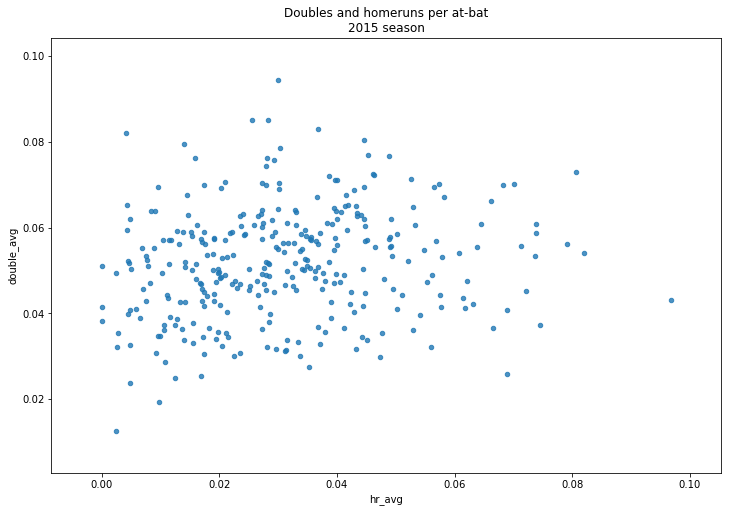

In [12]:
batting_2015.plot(x='hr_avg', y='double_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Doubles and homeruns per at-bat\n2015 season')

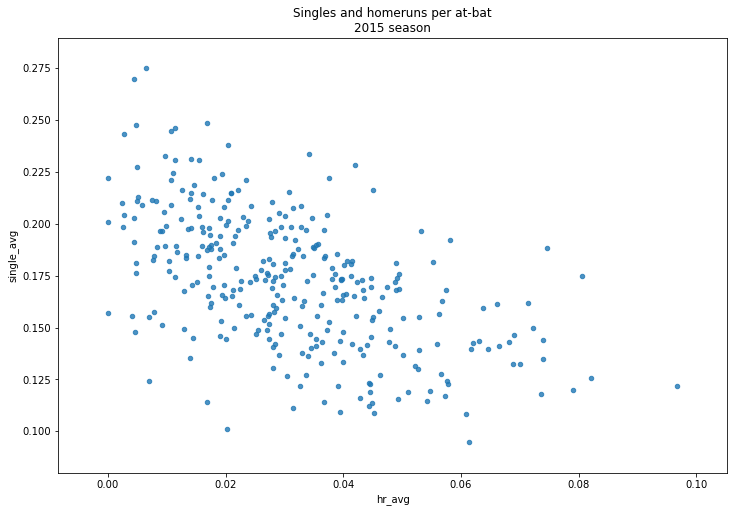

In [13]:
batting_2015.plot(x='hr_avg', y='single_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Singles and homeruns per at-bat\n2015 season')

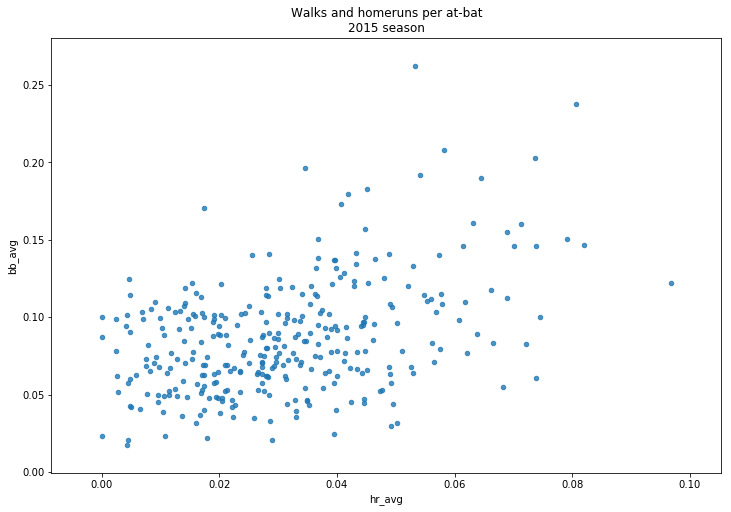

In [14]:
batting_2015.plot(x='hr_avg', y='bb_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Walks and homeruns per at-bat\n2015 season')

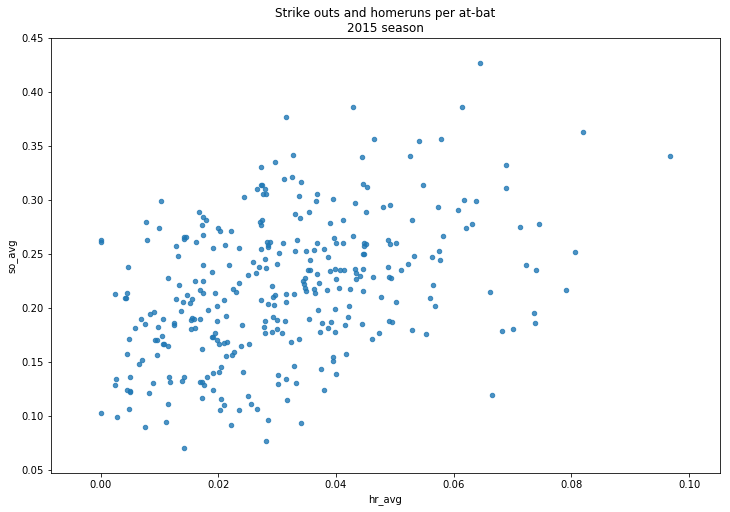

In [15]:
batting_2015.plot(x='hr_avg', y='so_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Strike outs and homeruns per at-bat\n2015 season')

### Is there a correlation between complete games and total pitchers?

There is a significant decline in the number of complete games (where the starting pitcher pitches all nine innings) over time. One likely explanation for this is that the number of pitchers per team has increased over time, meaning that starting pitchers do not have to pitch has much per game.

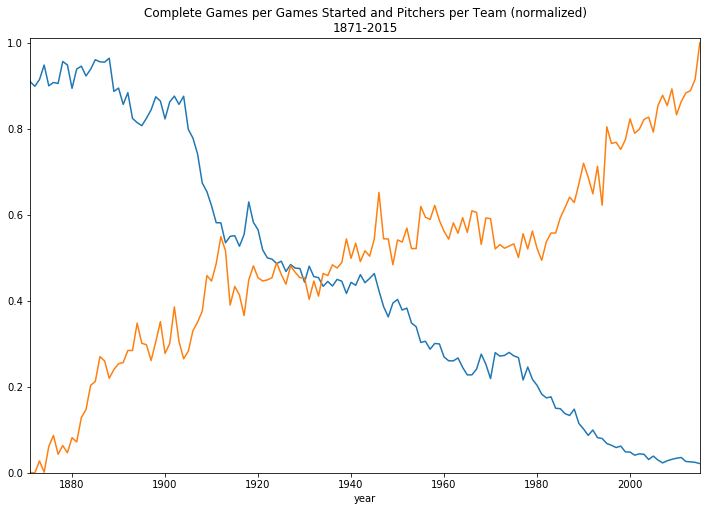

In [16]:
cg = pitching.groupby('year')['cg'].sum()
gs = pitching.groupby('year')['gs'].sum()
pitchers = pitching.groupby('year').size() / team.groupby('year').size()
pitchers = (pitchers - min(pitchers)) / (max(pitchers) - min(pitchers))
(cg/gs).plot(figsize=(12,8), title='Complete Games per Games Started and Pitchers per Team (normalized)\n1871-2015', ylim=0)
pitchers.plot(figsize=(12,8))

### What about shutouts?

Shutouts are generally associated with complete games. If a pitcher has not given up any runs, he is must less likely to be take out of the game. I find that the number of shutouts, like complete games, have declined since the 1970s, but were much more sporadic before then.

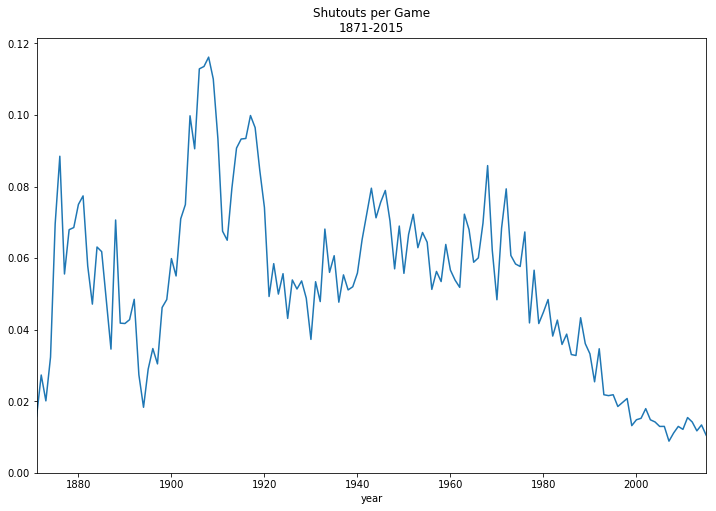

In [17]:
sho = pitching.groupby('year')['sho'].sum()
gs = pitching.groupby('year')['gs'].sum()
(sho/gs).plot(figsize=(12,8), title='Shutouts per Game\n1871-2015', ylim=0)

### Is there a correlation between strikeouts and walks per game?

The average number of strikeouts per game has been steadily increasing since the early 1900s, while the average number of walks per game has remained fairly stagnant.

One explanation is that pitchers have become better over time. Better pitching means more strikeouts, and because walks are sometimes a strategic move (not accidents or a sign of bad pitching), it makes sense that walks would not necessarily decline.

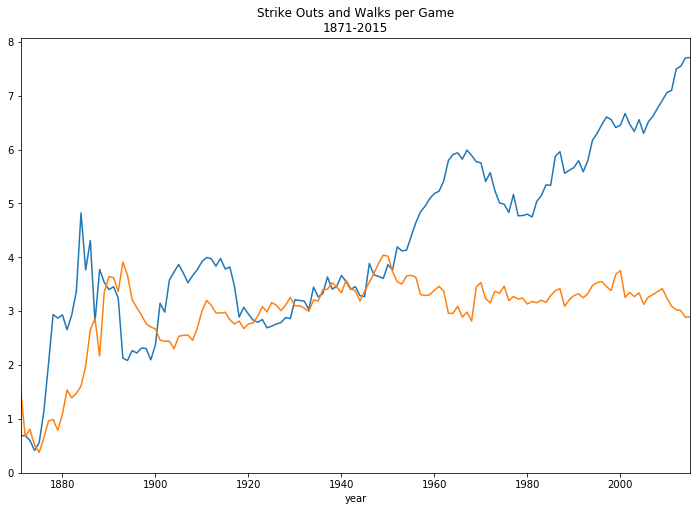

In [18]:
so = pitching.groupby('year')['so'].sum()
bb = pitching.groupby('year')['bb'].sum()
(so/gs).plot(figsize=(12,8), ylim=0)
(bb/gs).plot(figsize=(12,8), title='Strike Outs and Walks per Game\n1871-2015', ylim=0)